In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
data = pd.read_json("../assets/clean_reviews.json", orient='records')
data

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lisa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


,reviewid,title,artist,score,author,review_publication_date,genre,song_release_year,record_label,review_content
0,22703,mezzanine,massive attack,9.3,nate patrin,1483833600000,electronic,1998,virgin,"“Trip-hop” eventually became a ’90s punchline,..."
1,22721,prelapsarian,krallice,7.9,zoe camp,1483747200000,metal,2016,hathenter,"Eight years, five albums, and two EPs in, the ..."
2,22659,all of them naturals,uranium club,7.3,david glickman,1483747200000,rock,2016,static shock|fashionable idiots,Minneapolis’ Uranium Club seem to revel in bei...
3,22661,first songs,"kleenex, liliput",9.0,jenn pelly,1483660800000,rock,2016,kill rock stars|mississippi,Kleenex began with a crash. It transpired one ...
4,22725,new start,taso,8.1,kevin lozano,1483660800000,electronic,2016,teklife,It is impossible to consider a given release b...
...,...,...,...,...,...,...,...,...,...,...
18412,1535,let us replay!,coldcut,8.9,james p. wisdom,917308800000,jazz|electronic,None,ninja tune,The marketing guys of yer average modern megac...
18413,1341,1999,cassius,4.8,james p. wisdom,917308800000,electronic,None,astralwerks,"Well, it's been two weeks now, and I guess it'..."
18414,5376,out of tune,mojave 3,6.3,jason josephes,916099200000,rock,None,4ad,"Out of Tune is a Steve Martin album. Yes, I'l..."
18415,2413,"singles breaking up, vol. 1",don caballero,7.2,james p. wisdom,916099200000,rock|metal|experimental,1999,touch and go,"Well, kids, I just went back and re-read my re..."


In [16]:
reviews = np.array(data['review_content'])
print(np.sum(reviews[1:3]))

Eight years, five albums, and two EPs in, the New York-based outfit Krallice have long since shut up purists about their “hipster black metal.” Their four-man, post-structural assembly line runs at a breakneck pace, taking great care to balance the intricate (Colin Marston and Mick Barr’s interlocking riffs, Lev Weinstein’s head-spinning polyrhythms) with the incendiary (best exemplified by Barr and Nick McMaster’s shared, animalistic vocal duties; the former’s a screaming eagle, the latter a growling hellhound). The quartet frequently capitalize on the element of surprise; Krallice’s last two releases—2015’s Ygg Huur and last winter’s Hyperion EP—dropped spontaneously, a pair of inter-dimensional rifts masquerading as albums, far from the hum of the hype machine. Early last month, the band opened the portal once more to announce their sixth album Prelapsarian, subsequently released sans fanfare on the Winter Solstice. Upon first glance, Prelapsarian, which the band recorded last summe

In [29]:

for r in reviews[0:5]:
    splitted = r.split(' ')
    cleaned = [t.lower() for t in splitted if t.lower() not in stopwords.words('english')]
    all_counter = Counter(cleaned)
    most_occur = all_counter.most_common(5)
    print(most_occur)

[('mezzanine', 8), ('like', 7), ('massive', 6), ('it’s', 5), ('del', 5)]
[('last', 4), ('band', 4), ('krallice', 3), ('prelapsarian,', 3), ('albums,', 2)]
[('uranium', 9), ('club', 7), ('punk', 7), ('band', 5), ('it’s', 3)]
[('kleenex', 10), ('like', 8), ('punk', 6), ('songs', 6), ('kleenex’s', 6)]
[('footwork', 8), ('double', 7), ('taso', 5), ('way', 4), ('dj', 3)]


In [39]:
print(np.mean(wordcount))
print(np.median(wordcount))
print(np.max(wordcount))
print(np.min(wordcount))

687.6016776116109
645.0
1497
210


<AxesSubplot:ylabel='Density'>

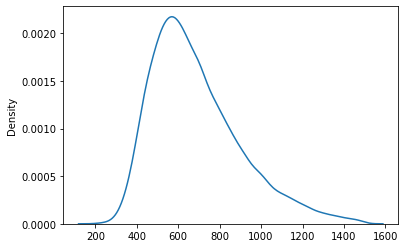

In [40]:
sns.kdeplot(wordcount)

In [45]:
wordcount = wordcounts[wordcounts > 200]
rating = ratings[wordcounts > 200]
rating = rating[wordcount < 1500]
wordcount = wordcount[wordcount < 1500]


<AxesSubplot:ylabel='Density'>

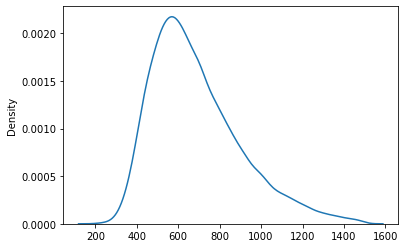

In [46]:
sns.kdeplot(wordcount)

In [47]:
scores = np.round(wordcount.astype(int)/200)*200.0
unique = np.unique(scores)
amount = [np.count_nonzero(wordcounts <= 200)]
r = [np.average(ratings[wordcounts <= 200])]
for i in unique:
    amount.append(np.count_nonzero(scores == i))
    r.append(np.average(rating[scores == i]))


amount.append(np.count_nonzero(wordcounts >= 1500))
r.append(np.average(ratings[wordcounts >= 1500]))
amount = np.array(amount)
unique = np.concatenate((np.array([0]), unique))
unique = np.concatenate((unique, np.array([1555])))
print(amount)
print(unique)
print(r)



[  29   31 3415 7392 4399 1888  756  240  267]
[   0.  200.  400.  600.  800. 1000. 1200. 1400. 1555.]
[6.289655172413792, 6.493548387096775, 6.786412884333821, 6.8831033549783545, 7.072016367356218, 7.272245762711864, 7.50568783068783, 7.765416666666667, 8.297752808988765]


<AxesSubplot:xlabel='wordcount', ylabel='score'>

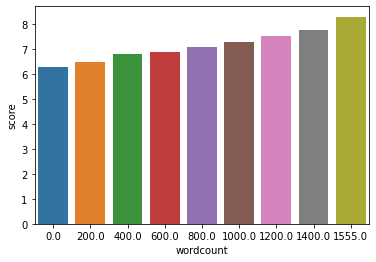

In [49]:
df = pd.DataFrame({'wordcount':unique, 'y':amount, 'score':r })
sns.barplot(data = df, x = 'wordcount', y = 'score')

<AxesSubplot:xlabel='wordcount', ylabel='score'>

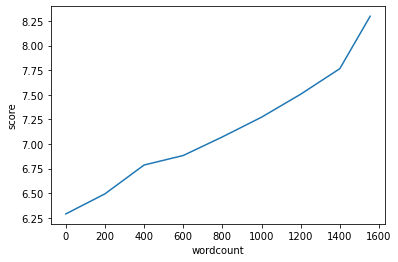

In [53]:
df2 = pd.DataFrame({'wordcount':wordcount, 'score':rating })
sns.lineplot(data = df, x = 'wordcount', y = 'score')

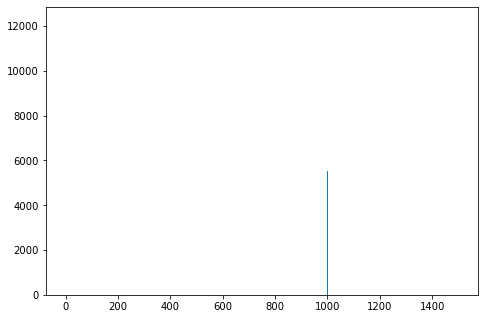

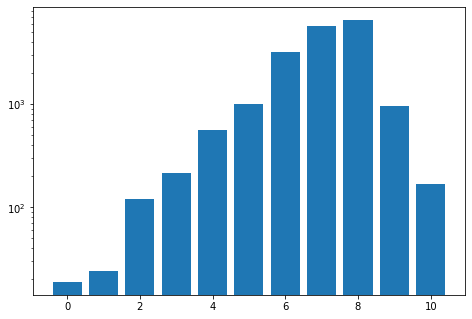